<a href="https://colab.research.google.com/github/sushily1997/Basic_Python_Assignments_1/blob/main/RFM_Analysis_Using_SQL_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calculating RFM using SQL**

In [ ]:
#Loading our dataset
import pandas as pd
df = pd.read_excel("/content/drive/MyDrive/Data Science Files/Copy of Online Retail.xlsx")

Lets Explore some in python 

In [ ]:
#checking our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#droping null values
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


# Dropping negative values

In [ ]:
df = df.drop(df.index[df['Quantity'] <= 0])
df = df.drop(df.index[df['UnitPrice'] <= 0])

# finding total revenue generated by each customer

In [ ]:
#calculating total revenue generated from each customer
TotalPurchaseAmount = df.Quantity * df.UnitPrice

df["Total_Revenue_Generated"] = TotalPurchaseAmount

display(df.sort_values("Total_Revenue_Generated", ascending = False))

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
540421,581483,80995,2011-09-12,2.080,16446.0,United Kingdom,168469.600
61619,541431,74215,2011-01-18,1.040,12346.0,United Kingdom,77183.600
222680,556444,60,2011-10-06,649.500,15098.0,United Kingdom,38970.000
173382,551697,1,2011-03-05,8142.750,16029.0,United Kingdom,8142.750
348325,567423,1412,2011-09-20,5.060,17450.0,United Kingdom,7144.720
...,...,...,...,...,...,...,...
500313,578757,1,2011-11-25,0.060,12748.0,United Kingdom,0.060
361741,568375,1,2011-09-26,0.001,13405.0,United Kingdom,0.001
279045,561226,1,2011-07-26,0.001,15618.0,United Kingdom,0.001
157195,550193,1,2011-04-15,0.001,13952.0,United Kingdom,0.001


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID,Total_Revenue_Generated
count,397884.000000,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453,22.397000
std,179.331775,22.097877,1713.141560,309.071041
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


# changing date time format in d-m-yy and removing hrs-ss

In [ ]:
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%d-%m-%Y')

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Dropping not required columns

In [ ]:
df.drop(['StockCode',"Description"], axis = 1 , inplace = True)

In [ ]:
df.columns

Index(['InvoiceNo', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'Total_Revenue_Generated'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   InvoiceNo                397884 non-null  object        
 1   Quantity                 397884 non-null  int64         
 2   InvoiceDate              397884 non-null  datetime64[ns]
 3   UnitPrice                397884 non-null  float64       
 4   CustomerID               397884 non-null  float64       
 5   Country                  397884 non-null  object        
 6   Total_Revenue_Generated  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 24.3+ MB


In [ ]:
df.head(5)

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
0,536365,6,2010-01-12,2.55,17850.0,United Kingdom,15.30
1,536365,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
2,536365,8,2010-01-12,2.75,17850.0,United Kingdom,22.00
3,536365,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
4,536365,6,2010-01-12,3.39,17850.0,United Kingdom,20.34


In [ ]:
#saving our new data in csv
#and we use this data for RFM analysis and here after we use sql
df.to_csv('Online Retail New.csv')

In [ ]:
#checking our new dataset
pd.read_csv('/content/Online Retail New.csv')

,Unnamed: 0,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Revenue_Generated
0,0,536365,6,2010-01-12,2.55,17850.0,United Kingdom,15.30
1,1,536365,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
2,2,536365,8,2010-01-12,2.75,17850.0,United Kingdom,22.00
3,3,536365,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
4,4,536365,6,2010-01-12,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
397879,541904,581587,12,2011-09-12,0.85,12680.0,France,10.20
397880,541905,581587,6,2011-09-12,2.10,12680.0,France,12.60
397881,541906,581587,4,2011-09-12,4.15,12680.0,France,16.60
397882,541907,581587,4,2011-09-12,4.15,12680.0,France,16.60


#used data.world For **SQL**

# **SQL Query**

In [ ]:
#sql query for rfm analysis
'''WITH dataset AS (
        select customerid, 
            max(invoicedate) as last_order_date,
            count(*) as count_order,
            avg(online_retail_new_4.total_revenue_generated) as avg_amount
        from online_retail_new_4
        group by customerid
), 
order_s as (       
        select customerid, 
            ntile(5) over (order by last_order_date) as rfm_recency,
            ntile(4) over (order by count_order) as rfm_frequency,
            ntile(4) over (order by avg_amount) as rfm_monetary
        from dataset
)
select customerid, rfm_recency*100 + rfm_frequency*10 + rfm_monetary as rfm_combined 
from order_s
ORDER BY customerid ASC'''

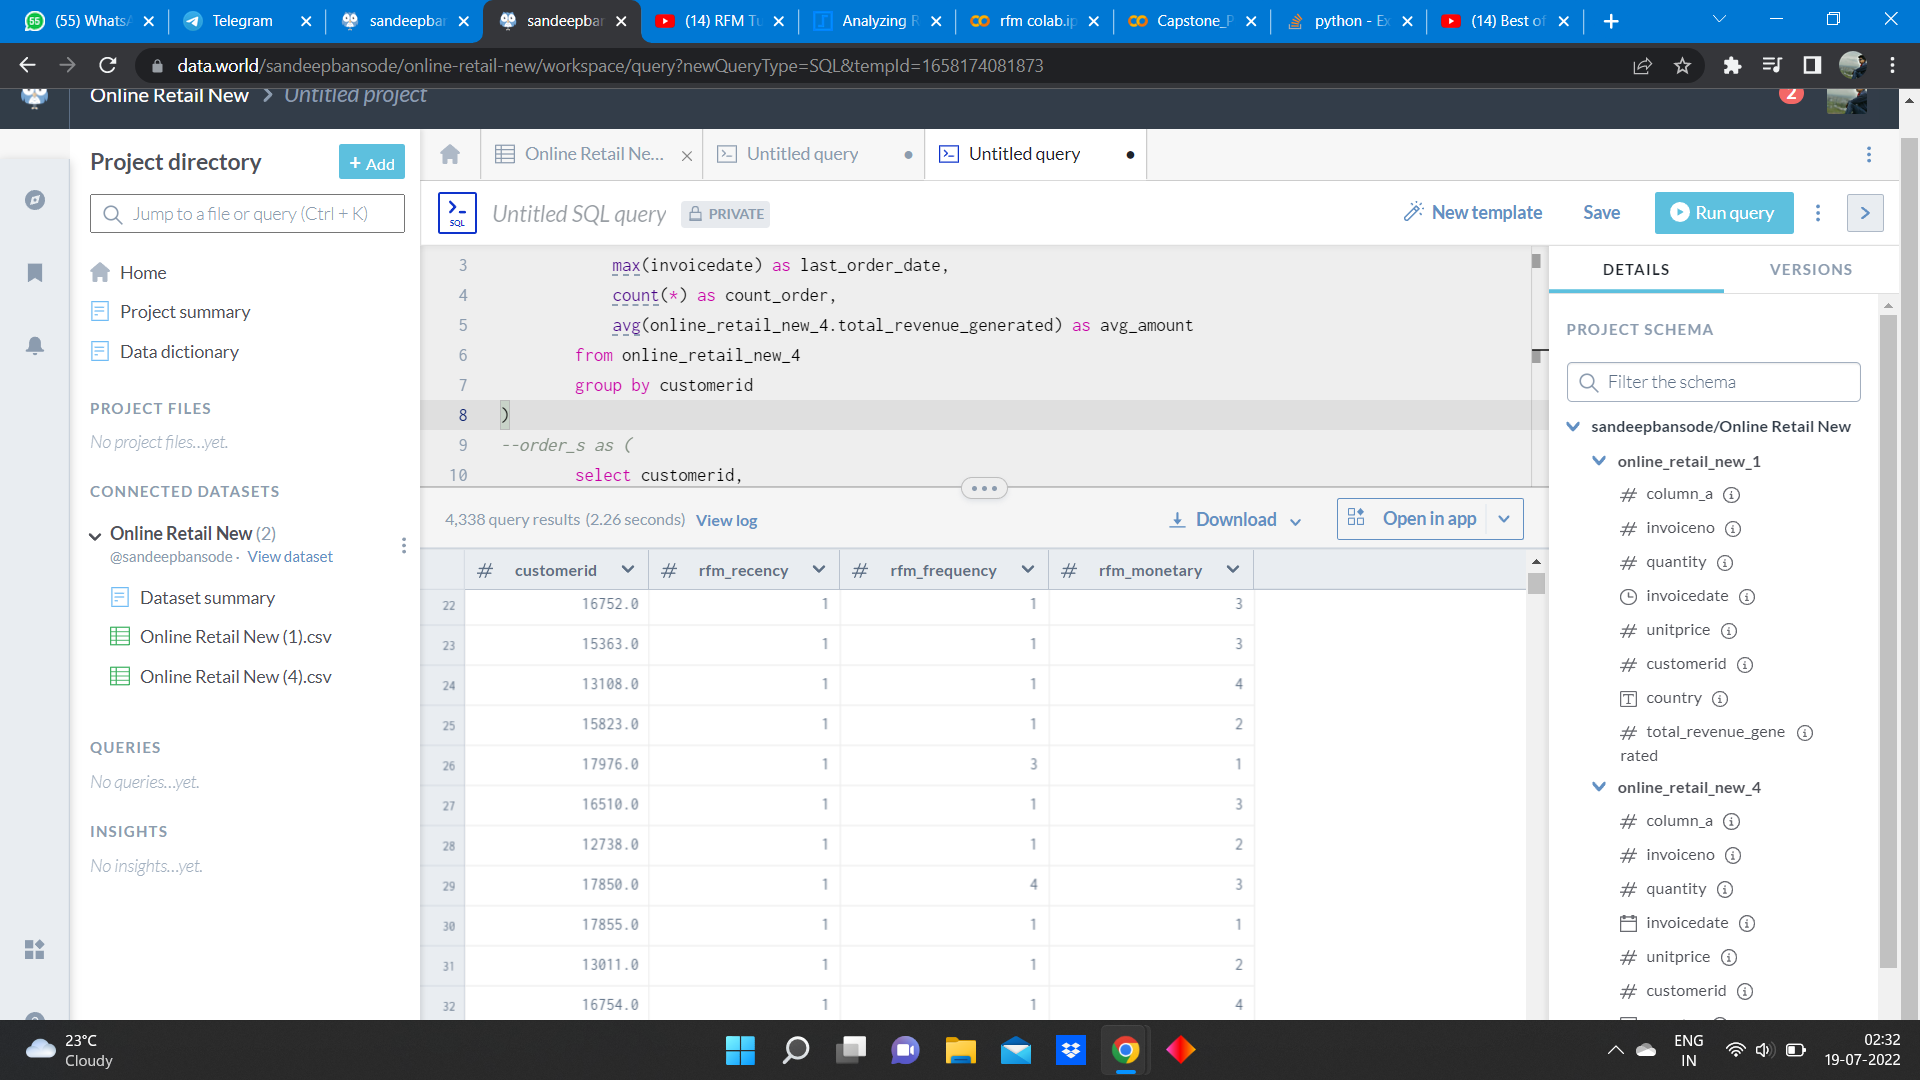

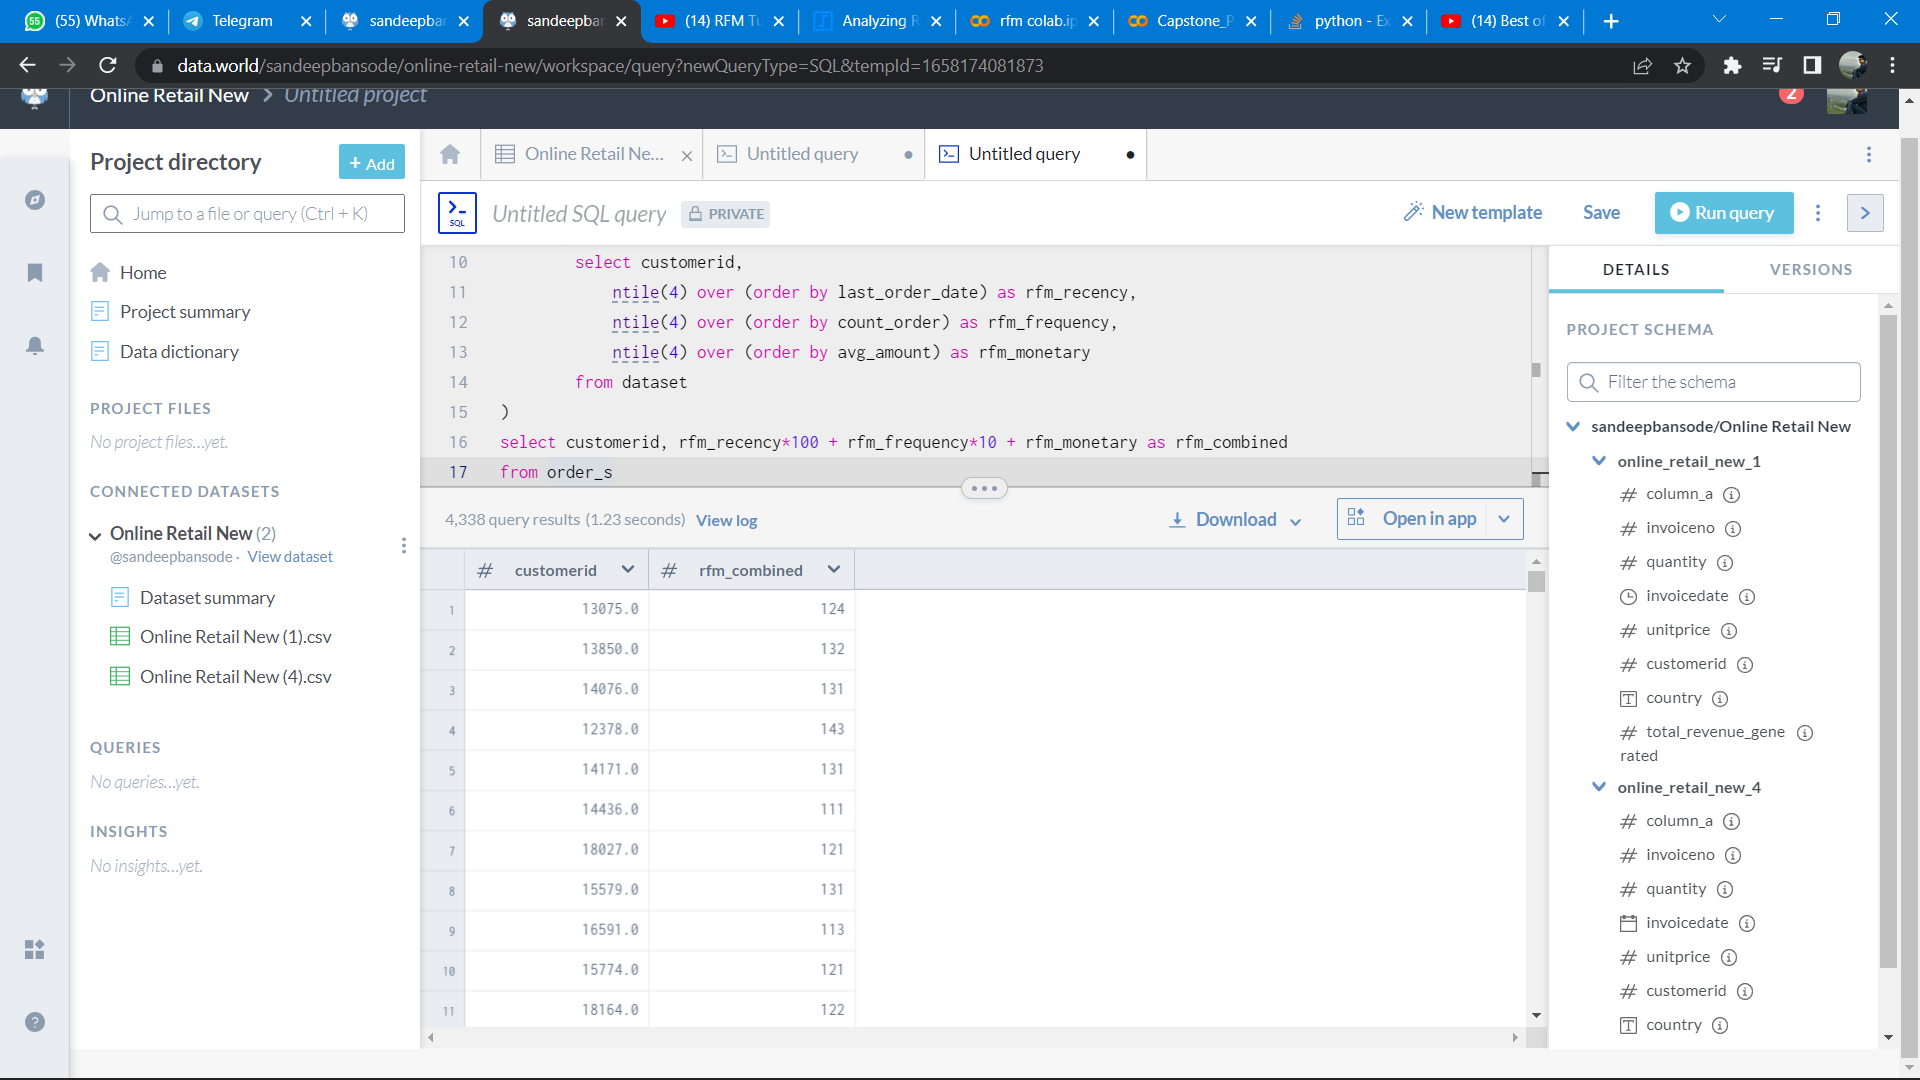

# **SQL Query for rfm**

In [ ]:
#different querry for rfm analysis
'''--SELECT * FROM online_retail_new_1;
-- /** Step  1 : Filter Dataset **/
WITH dataset AS(
    SELECT 
    online_retail_new_4.invoiceno,
    customerid,
    Quantity, InvoiceDate, UnitPrice,
    Country, Total_Revenue_Generated
    FROM online_retail_new_4
    WHERE country = 'United Kingdom'
),
-- step 2 : exam the dataset 
--SELECT 
--    invoiceno,
--    customerid, 
--    InvoiceDate,
--    Total_Revenue_Generated
        --COUNT(online_retail_new_1.invoiceno) OVER(PARTITION BY customerid,online_retail_new_1.invoiceno)
--FROM dataset  

-- step 3 : summarize dataset
Order_Summary as (
    SELECT 
        customerid, invoiceno, invoicedate,
        SUM(total_revenue_generated) AS   total_sales 
    FROM dataset
    GROUP BY customerid , invoiceno, invoicedate
)
-- /** step 4 : Put together the RFM Report **/
SELECT
Customerid,-- invoiceno ,invoicedate,
--(SELECT MIN(invoicedate) FROM order_summary) as min_order_date ,
--(SELECT MAX(invoicedate) FROM order_summary WHERE customerid = customerid) as max_customer_order_date ,
DATE_DIFF ((SELECT MIN(invoicedate) FROM order_summary),
( SELECT MAX(invoicedate) FROM order_summary WHERE customerid = customerid ) , 'DAY' ) as Recency ,
COUNT (invoiceno) as Frequency,
SUM(total_sales) as monetary

FROM order_summary 
Group BY customerid
ORDER BY 1, 3 DESC'''

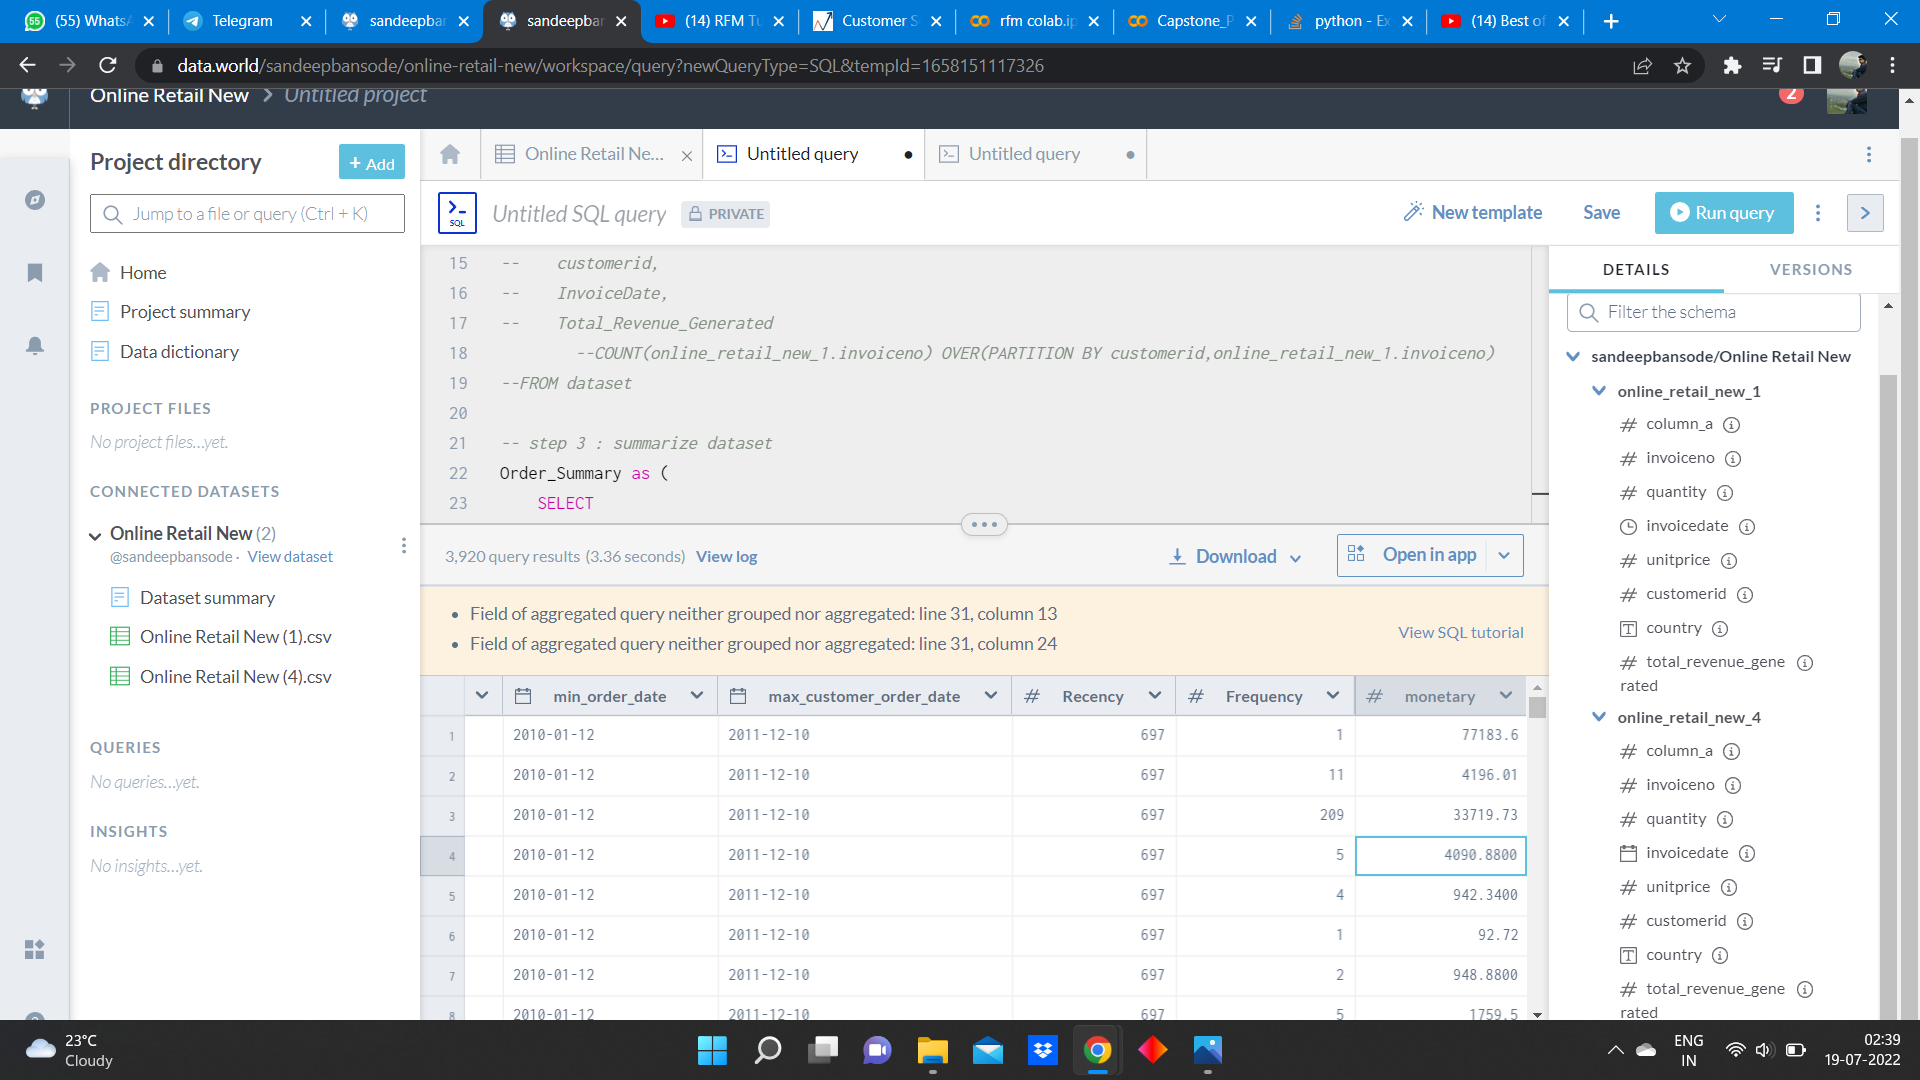